## Bank Institution Term Deposit Predictive Model

### Scenario

You successfully finished up to your rigorous job interview process with Bank of Portugal as a machine learning researcher. The investment and portfolio department would want to be able to identify their customers who potentially would subscribe to their term deposits. As there has been heightened interest of marketing managers to carefully tune their directed campaigns to the rigorous selection of contacts, the goal of your employer is to find a model that can predict which future clients who would subscribe to their term deposit. Having such an effective predictive model can help increase their campaign efficiency as they would be able to identify customers who would subscribe to their term deposit and thereby direct their marketing efforts to them. This would help them better manage their resources (e.g human effort, phone calls, time).


### Data


The data and feature description for this challenge can be found here (http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

### Table of content
1. Importing the necessary libraries
2. Data importation
3. Exploratory Data Analysis
    * Univariate data analysis
    * Bivariate data analysis
4. Exploratory Data Analysis
    * Removal of outliers
    * Categotical feature encoding
    * Numerical Feature scaling
5. Handling Class Imbalance
6. Dimensionality reduction

#### Importing the necessary libraries

In [2]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# os
import os

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# warnings
import warnings
warnings.filterwarnings('ignore')

# sklearn packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Class imbalance
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

First, we need to import the path with raw data

In [3]:
# setting the raw path
raw_data_path = os.path.join(os.path.pardir,"data","raw")
bank_file_path = os.path.join(raw_data_path,"bank-additional-full.csv")

Now we import the Bank data

In [4]:
bank_data = pd.read_csv(bank_file_path,sep = ';')

#### Data Understanding
Let us know have a glance at how our data looks like and it's structure.

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


###   Below is the Variable description of the Bank dataset
| variable         | description |
| ---------------- | ------------|
| `age`            | client's age (numeric)                                                |<br>
| `job`            | type of job (categorical)                                             |<br>
| `marital`        | marital status (categorical                                           |<br>
| `education`      | education level (categorical)                                         |<br>
| `default`        | if client has credit in default (categorical)                         |<br>
| `housing`        | if client has housing loan (categorical)                              |<br>
| `loan`           | if client has personal loan (categorical)                             |<br>
| `contact`        | contact communication type (categorical)                              |<br>
| `month`          | last contact month of the year (categorical)                          |<br>
| `day_of_week`    | last contact day of the week (categorical)                            |<br>
| `duration`       | last contact duration, in seconds (numeric)                           |<br> 
| `campaign`       | number of contacts performed during this campaign and for this client |<br> 
| `pdays`          | number of days that passed by after the client was last contacted from a previous campaign |<br>
| `previous`       | number of contacts performed before this campaign and for this client (numeric) |<br>
| `poutcome`       | outcome of the previous marketing campaign (categorical) |<br>
| `emp.var.rate`   | employment variation rate - quarterly indicator (numeric) |<br>
| `cons.price.idx` | consumer price index - monthly indicator (numeric)        |<br>
| `cons.conf.idx`  | consumer confidence index - monthly indicator (numeric)   |<br>
| `euribor3m`      | euribor 3 month rate - daily indicator (numeric)          |<br>
| `nr.employed`    | number of employees - quarterly indicator (numeric)       |<br>

In [14]:
bank_data.shape

(41188, 21)

In [15]:
#Checking the data datatypes.
bank_dtypes = pd.DataFrame(bank_data.dtypes,columns =["Data_Type"] )

In [16]:
bank_dtypes

,Data_Type
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [30]:
class Information:
    def __init__(self):
        """
        This class give some brief information about the datasets.
        """
        print("Information object created")
    
    def _get_missing_values(self,data):
        """
        Find missing values of given datad
        :param data: checked its missing value
        :return: Pandas Series object
        """
        #Getting sum of missing values for each feature
        missing_values = bank_data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)

        #Returning missing values
        return missing_values
    
    def _get_unique_values(self,data):
        #Getting unique alues for each feature
        unique_values = bank_data.nunique()
        #Sorting the values
        unique_values.sort_values(ascending=False, inplace=True)
        
        #Returning unique values values
        return unique_values

In [33]:
bank_info = Information()
bank_info._get_unique_values(bank_data)

Information object created


duration          1544
euribor3m          316
age                 78
campaign            42
pdays               27
cons.conf.idx       26
cons.price.idx      26
job                 12
nr.employed         11
month               10
emp.var.rate        10
previous             8
education            8
day_of_week          5
marital              4
poutcome             3
loan                 3
housing              3
default              3
contact              2
y                    2
dtype: int64

In [34]:
bank_info._get_missing_values(bank_data)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

In [10]:
# Summary of the numerical columns
bank_data.select_dtypes(include=["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [9]:
# Summary of the categorical columns
bank_data.select_dtypes(include=["object"]).describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


Great, our data has no missing values, now we can check out for the outliers.

In [ ]:
#Defining the path to save the figures/plots.
figures_data_path = os.path.join(os.path.pardir, 'reports','figures')

{'age': True, 'duration': True, 'campaign': True, 'pdays': True, 'previous': True, 'emp.var.rate': False, 'cons.price.idx': False, 'cons.conf.idx': True, 'euribor3m': False, 'nr.employed': False},

 Visualization of outlier columns


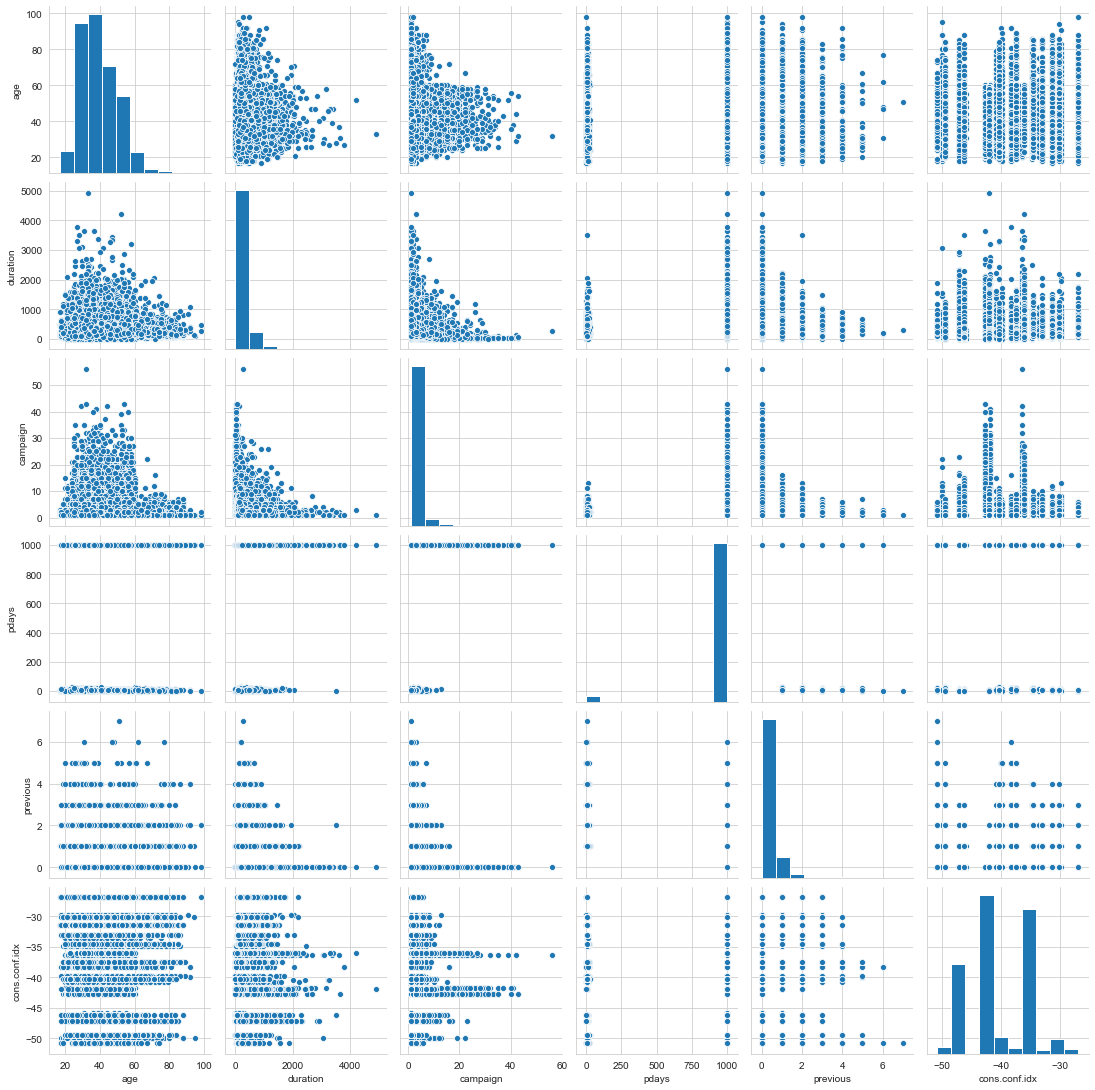

In [13]:
def outlier_vars(data, show_plot=True):
    
    """
    This functions checks for columns with outlers using the IQR method
    
    It accespts as argmuent a dataset. 
    show_plot can be set to True to output pairplots of outlier columns
    
    """
    
    outliers = []
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    num_data = data.select_dtypes(include='number')
    result = dict ((((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR)))==True).any())
    for k,v in result.items():
        if v == True:
            outliers.append(k)
    if show_plot:
        pair_plot = sns.pairplot(data[outliers]);
        print(f'{result},\n\n Visualization of outlier columns')
        return pair_plot
    else:
        return data[outliers]
    #my_outliers = result + '.png'
    #plt.savefig(os.path.join(figures_data_path, my_outliers))
    
outlier_vars(bank_data)

## Exploratory Data Analysis

### Univariate Analysis

`Target variable : y`

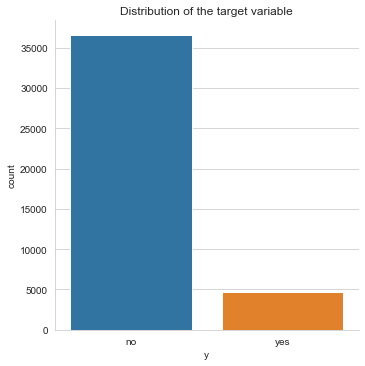

In [17]:
sns.catplot(x ="y",data = bank_data,kind ="count")
plt.title("Distribution of the target variable")
plt.savefig("target_variable.png")
plt.show()

More clients did not subscribe compared to the one's who did not subscribe. This is an instance of class imbalance.
When the dataset has underrepresented data(in this case the class yes), the class distribution starts skew. To deal with this we are going to to use Random Oversampler mehod to deal with the imbalanced data.

`Marital`

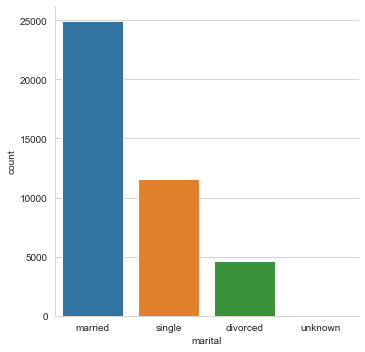

In [84]:
sns.catplot(x ="marital",data = bank_data,kind ="count")

`job`

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

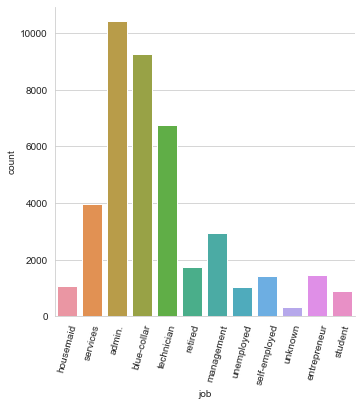

In [42]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.catplot(x ="job",data = bank_data,kind ="count")
plt.xticks(rotation = 75)

`education`

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

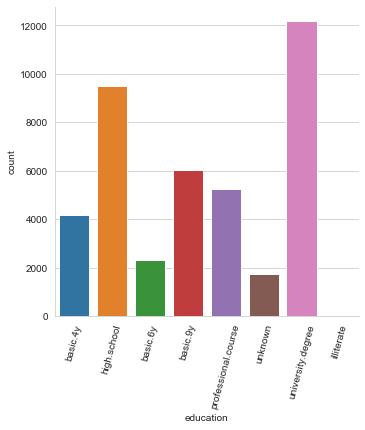

In [100]:
sns.catplot(x ="education",data = bank_data,kind ="count")
plt.xticks(rotation = 75)

`default` 

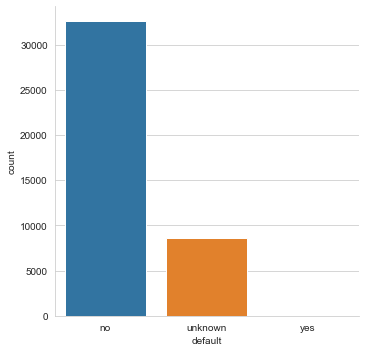

In [88]:
sns.catplot(x = "default",data = bank_data,kind ="count")

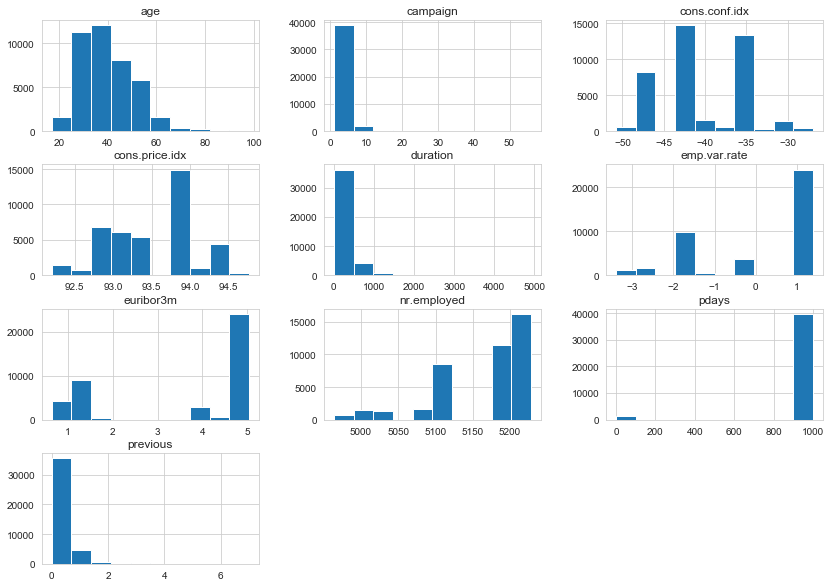

In [16]:
bank_data.hist(bins= 10, figsize=(14, 10))
plt.savefig("Distribution.png")
plt.show()

Observation:The age distribution is skewed to the left. Most clients are on their late 20's and Thirties.

## Bivariate Analysis

In [20]:
def boxplot(x, y, data=bank_data, hue= "y"):
    plot = sns.boxplot(x= x, y=y, hue=hue, data= bank_data)
    plt.xticks( rotation=45, horizontalalignment='right' )
    plt.title("Boxplot of " + " " + x.upper() + " " + "and "+ " " + y.upper())
    plt.savefig("boxplot.png")
    return plot

`marital satus vs age and target`

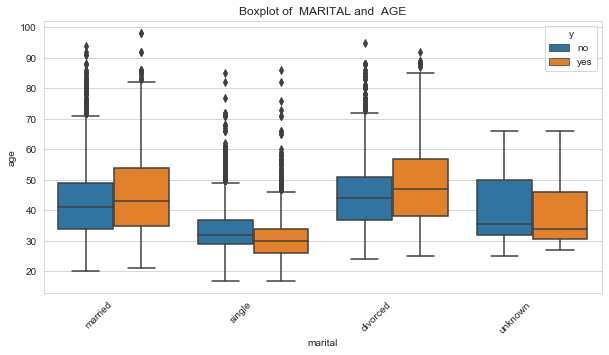

In [47]:
boxplot("marital", "age", data=bank_data, hue= "y")

`education level vs age and target`

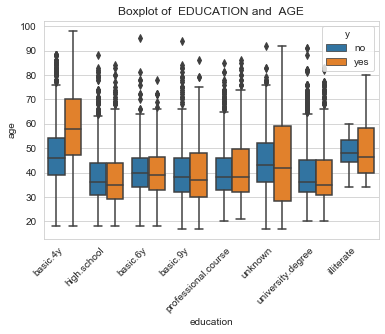

In [21]:
boxplot("education", "age", data=bank_data, hue= "y")

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

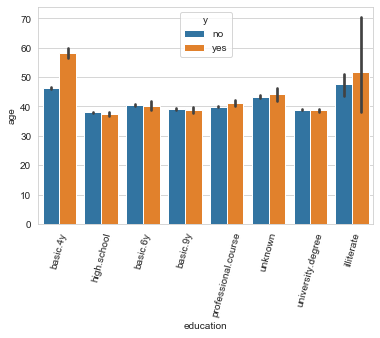

In [8]:
sns.barplot(x = "education", y="age", data=bank_data, hue= "y")
plt.xticks(rotation = 75)

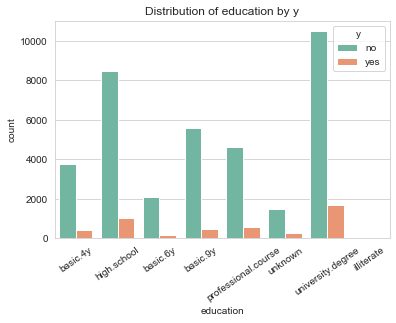

In [16]:
sns.countplot(x="education",hue="y", data=bank_data,
              palette=sns.color_palette("Set2", n_colors=2)).set_title("Distribution of education by y")
plt.xticks(rotation = 35)
plt.savefig("Education.png")
plt.show()

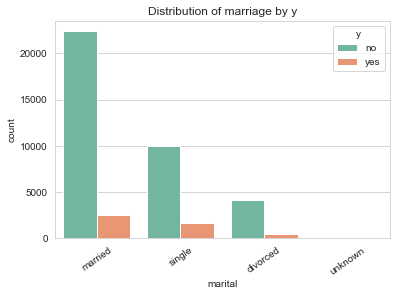

In [17]:
sns.countplot(x="marital",hue="y", data=bank_data,
              palette=sns.color_palette("Set2", n_colors=2)).set_title("Distribution of marriage by y")
plt.xticks(rotation = 35)
plt.savefig("marital.png")
plt.show()

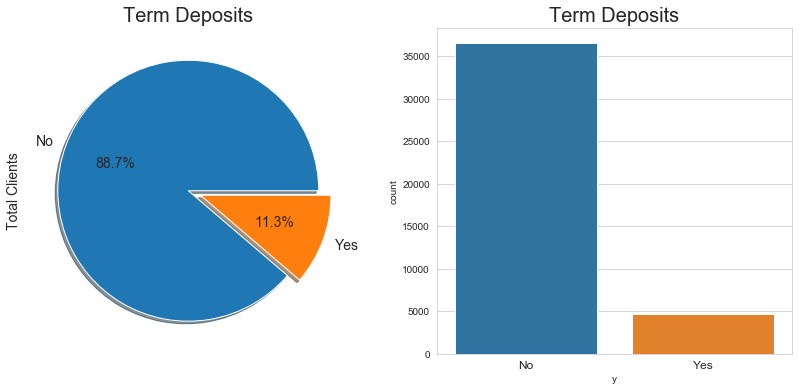

In [22]:
f,ax=plt.subplots(1,2, figsize=(14,6))
labels = 'No', 'Yes'
bank_data['y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=14)
ax[0].set_title('Term Deposits', fontsize=20)
ax[0].set_ylabel('Total Clients', fontsize=14)
sns.countplot('y',data=bank_data,ax=ax[1])
ax[1].set_title('Term Deposits', fontsize=20)
ax[1].set_xticklabels(['No', 'Yes'], fontsize=12)
plt.savefig("Ditribution of Term Deposits.png")
plt.show()

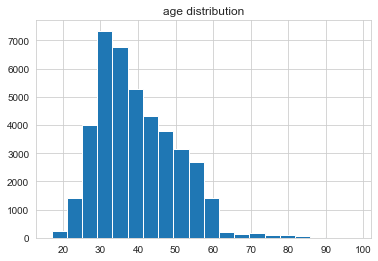

In [23]:
plt.hist(bank_data.age,cumulative=False, bins=20)
plt.title("age distribution")
plt.savefig("age distribution.png")

#### Correlation matrix

In [79]:
bank_data.corr()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


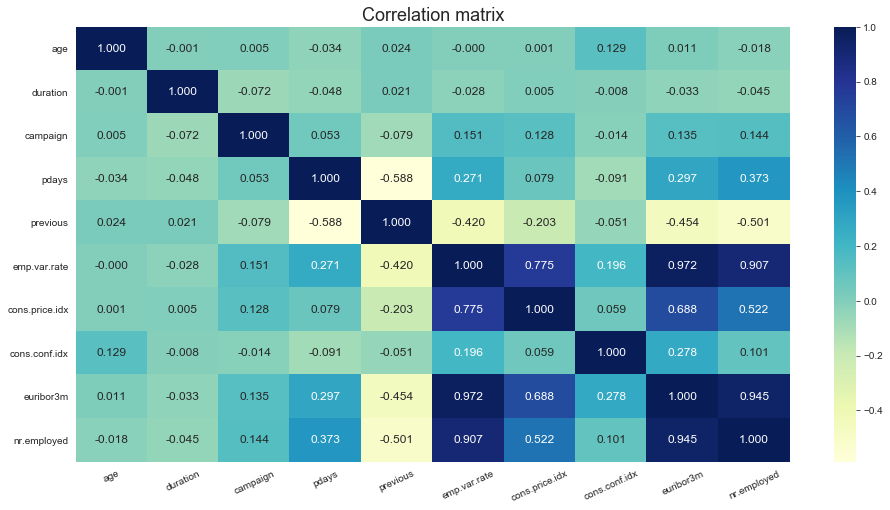

In [22]:
correlation_df = bank_data
corr_table = correlation_df.iloc[:, :].corr()
corr_table
plt.figure(figsize=(16,8))
ax = sns.heatmap(corr_table, annot=True,
                fmt=".3f",
                annot_kws={'size':12},
                cmap="YlGnBu")
plt.title('Correlation matrix', fontsize=18)
plt.tight_layout
plt.xticks(rotation = 25)
plt.savefig("Correlation_heatmap.png")
plt.show()

## Data Preprocessing.

`Duration` attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and shall be discarded if the intention is to have a realistic predictive model.

In [40]:
def preprocess(data):
    data = data.drop(["duration"],axis = 1)
    
    data['education'].replace({'basic.9y': 'basic','basic.4y': 'basic','basic.6y':'basic','unknown':'illiterate'},inplace=True)
    
    data['job'].replace({'self-employed':'entrepreneur'},inplace=True)

    return data

In [41]:
bank_df = preprocess(bank_data)

In [42]:
bank_df["education"].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
illiterate              1749
Name: education, dtype: int64

### Categorical Feature encoding

`Binary Encoding`

In [43]:
# y column
bank_df['subscription'] = np.where(bank_df.y == 'yes', 1, 0)

In [44]:
# OneHotEncoding
bank_df = pd.get_dummies(bank_df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                                'day_of_week', 'poutcome'])

In [45]:
#dropping the y variable
bank_df = bank_df.drop(['y'], axis=1)

In [46]:
# reorder columns
columns = [column for column in bank_df.columns if column != 'subscription']
columns = ['subscription'] + columns 
bank_df = bank_df[columns]

### Numerical feature scaling

In [47]:
# Select numerical columns
numeric_columns = ['emp.var.rate',"pdays","age", 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']

In [48]:
scaler = StandardScaler()
bank_df[numeric_columns] = scaler.fit_transform(bank_df[numeric_columns])

In [49]:
bank_df.head()

,subscription,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,0,0,1,0
1,0,1.628993,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,0,0,1,0
2,0,-0.290186,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,0,0,1,0
3,0,-0.002309,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,0,0,1,0
4,0,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,0,0,1,0


### Removing The outliers : 
Outliers can skew statistical measures and data distributions, providing a misleading representation of the underlying data and relationships. Removing outliers from training data prior to modeling can result in a better fit of the data and, in turn, more skillful predictions.

In [50]:
# Create independent and Dependent features
columns = bank_df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["subscription"]]
# Store the variable we are predicting
target = "subscription"
# Define a random state
state = np.random.RandomState(42)
X = bank_df[columns]
y = bank_df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# print the shapes of X and Y
print(X.shape)
print(y.shape)

(41188, 58)
(41188,)


## Dealing with Imbalanced data: Random Over-sampling Technique
Overview; 
Random resampling provides a naive technique for rebalancing the class distribution for an imbalanced dataset.Random oversampling duplicates examples from the minority class in the training dataset.In our case we are going to duplicate the examples in the minority class which is the `yes` class to ensure we have a balanced data.


In [1]:
def catplot(x,data):
    plot= sns.catplot(x, kind="count", data=data, palette="Set1")
    plt.xticks(rotation=45, horizontalalignment='right' )
    plt.title("counts"+ " "+ "of" + " "+ " " + x )
    return 
catplot("subscription",data = bank_df)

NameError: name 'bank_df' is not defined

In [52]:
# Defuining the random sampler function.
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X, y)

In [53]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (73096, 58)
After OverSampling, the shape of train_y: (73096,) 



In [54]:
X_train_res.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0
1,1.628993,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0
2,-0.290186,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0
3,-0.002309,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,1,...,0,0,0,1,0,0,0,0,1,0
4,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0


## Data Transformation:Dimensionality reduction
### Principal Component Analysis
The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(X_train_res)
X = pca.transform(X_train_res)

In [67]:
principal_Df = pd.DataFrame(data = X
             , columns = ['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7',
                          'PC_8', 'PC_9','PC_10'])
principal_Df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,0.276952,-2.230390,1.150139,1.734079,0.584299,0.719070,0.793892,0.370116,-0.383854,-0.092316
1,0.325383,-2.277034,1.198151,1.756273,0.585499,0.716764,0.775411,0.328545,-0.466620,0.029165
2,0.305623,-2.285808,0.962704,0.331221,-0.654719,0.693620,-0.562380,0.760334,-0.313974,-0.431215
3,0.313300,-2.287627,1.025344,0.619066,-0.431421,0.810397,0.780307,0.347035,-0.386384,-0.559888
4,0.271695,-2.218908,1.137037,1.606776,0.457425,0.722874,0.590432,0.014998,-0.544215,-0.160568
...,...,...,...,...,...,...,...,...,...,...
73091,-1.469730,-0.583999,-1.701791,-1.001197,0.649580,-0.461777,0.046504,1.815359,0.073818,-0.160039
73092,-1.917454,-0.030901,-1.205775,0.121548,-1.060005,1.826849,-0.468015,1.107492,-0.075701,-0.374454
73093,-1.771850,-0.215546,-1.600661,-1.517692,0.324509,-0.196669,1.150786,0.606502,0.782906,0.703673
73094,-0.834298,0.271174,-1.564454,0.495120,2.249330,-0.581730,-0.741063,-0.385085,-0.566121,-0.250167


In [68]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29397836 0.20062126 0.10630713 0.0727688  0.05776813 0.03349468
 0.02171558 0.02008955 0.01500853 0.0143147 ]


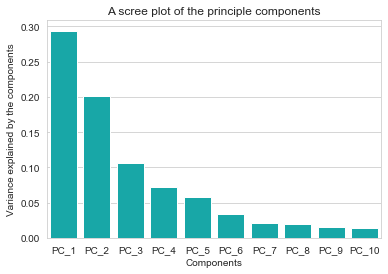

In [70]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7',
                          'PC_8', 'PC_9','PC_10']})
sns.barplot(x='PC',y="var", 
           data=df, color="c")
plt.xlabel("Components")
plt.ylabel("Variance explained by the components")
plt.title("A scree plot of the principle components")
plt.savefig("A plot of variance explained by Components.png")
plt.show()

Now let's save the preprocessed data for use in modeling

In [72]:
processed_data_path = os.path.join(os.path.pardir, 'data','processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

# train data
principal_Df.to_csv(write_train_path,index = False)
#test data
y_train_res.to_csv(write_test_path,index = False)
